In [1]:
import pandas as pd 
import numpy as np 
from scipy.stats import norm

#visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#hipothesis testing
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#misc
import pickle as pkl
import datetime as dt
from sklearn.utils import resample

#model training 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_tree


## 1. EDA

In [2]:
df = pd.read_csv("./data/ten_years_of_earthquakes_TW.csv")
df.head(10)

,number,date,longitude_e,latitude_n,magnitude,depth,location,loc_full,loc_name,mag_exp,mag_exp_cumul,mag_exp_cumul_norm
0,85,2023-12-31 05:57:10,121.839,24.6018,4.6,49.3,24.60N 121.84E,i.e. 16.3 km SSE of Yilan County(24.60N 121.84E,i.e. 16.3 km SSE of Yilan County),39810.717055,39810.717055,0.000144
1,Small area,2023-12-26 08:21:57,121.491,23.0357,3.7,26.6,23.04N 121.49E,i.e. 46.7 km NE of Taitung County(23.04N 121.49E,i.e. 46.7 km NE of Taitung County),5011.872336,44822.589392,0.000162
2,Small area,2023-12-26 06:19:24,121.755,24.3803,3.0,6.3,24.38N 121.76E,i.e. 38.8 km S of Yilan County(24.38N 121.76E,i.e. 38.8 km S of Yilan County),1000.000000,45822.589392,0.000166
3,Small area,2023-12-25 19:04:24,121.184,23.1407,3.4,14.5,23.14N 121.18E,i.e. 42.8 km N of Taitung County(23.14N 121.18E,i.e. 42.8 km N of Taitung County),2511.886432,48334.475823,0.000175
4,Small area,2023-12-25 11:49:35,121.919,24.4283,3.8,29.9,24.43N 121.92E,i.e. 37.1 km SSE of Yilan County(24.43N 121.92E,i.e. 37.1 km SSE of Yilan County),6309.573445,54644.049268,0.000198
5,Small area,2023-12-24 17:19:17,121.323,22.6363,4.4,21.0,22.64N 121.32E,i.e. 22.0 km SE of Taitung County(22.64N 121.32E,i.e. 22.0 km SE of Taitung County),25118.864315,79762.913583,0.000289
6,Small area,2023-12-24 05:21:18,121.308,22.6452,4.6,19.2,22.65N 121.31E,i.e. 20.2 km SE of Taitung County(22.65N 121.31E,i.e. 20.2 km SE of Taitung County),39810.717055,119573.630638,0.000433
7,Small area,2023-12-24 05:07:51,121.303,22.6458,4.5,19.0,22.65N 121.30E,i.e. 19.8 km SE of Taitung County(22.65N 121.30E,i.e. 19.8 km SE of Taitung County),31622.776602,151196.407240,0.000548
8,Small area,2023-12-23 10:32:34,122.141,24.2717,4.7,55.1,24.27N 122.14E,i.e. 61.4 km ENE of Hualien County(24.27N 122...,i.e. 61.4 km ENE of Hualien County),50118.723363,201315.130603,0.000730
9,Small area,2023-12-22 18:09:31,120.923,23.7777,3.6,28.1,23.78N 120.92E,i.e. 27.5 km ESE of Nantou County(23.78N 120.92E,i.e. 27.5 km ESE of Nantou County),3981.071706,205296.202308,0.000744


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6543 entries, 0 to 6542
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number              6543 non-null   object 
 1   date                6543 non-null   object 
 2   longitude_e         6543 non-null   float64
 3   latitude_n          6543 non-null   float64
 4   magnitude           6543 non-null   float64
 5   depth               6543 non-null   float64
 6   location            6543 non-null   object 
 7   loc_full            6543 non-null   object 
 8   loc_name            6543 non-null   object 
 9   mag_exp             6543 non-null   float64
 10  mag_exp_cumul       6543 non-null   float64
 11  mag_exp_cumul_norm  6543 non-null   float64
dtypes: float64(7), object(5)
memory usage: 613.5+ KB


In [4]:
df.date = pd.to_datetime(df.date)

In [5]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month_name()
df['day'] = df.date.dt.day_name()
df['hour'] = df.date.dt.hour


In [6]:
df.head()

,number,date,longitude_e,latitude_n,magnitude,depth,location,loc_full,loc_name,mag_exp,mag_exp_cumul,mag_exp_cumul_norm,year,month,day,hour
0,85,2023-12-31 05:57:10,121.839,24.6018,4.6,49.3,24.60N 121.84E,i.e. 16.3 km SSE of Yilan County(24.60N 121.84E,i.e. 16.3 km SSE of Yilan County),39810.717055,39810.717055,0.000144,2023,December,Sunday,5
1,Small area,2023-12-26 08:21:57,121.491,23.0357,3.7,26.6,23.04N 121.49E,i.e. 46.7 km NE of Taitung County(23.04N 121.49E,i.e. 46.7 km NE of Taitung County),5011.872336,44822.589392,0.000162,2023,December,Tuesday,8
2,Small area,2023-12-26 06:19:24,121.755,24.3803,3.0,6.3,24.38N 121.76E,i.e. 38.8 km S of Yilan County(24.38N 121.76E,i.e. 38.8 km S of Yilan County),1000.000000,45822.589392,0.000166,2023,December,Tuesday,6
3,Small area,2023-12-25 19:04:24,121.184,23.1407,3.4,14.5,23.14N 121.18E,i.e. 42.8 km N of Taitung County(23.14N 121.18E,i.e. 42.8 km N of Taitung County),2511.886432,48334.475823,0.000175,2023,December,Monday,19
4,Small area,2023-12-25 11:49:35,121.919,24.4283,3.8,29.9,24.43N 121.92E,i.e. 37.1 km SSE of Yilan County(24.43N 121.92E,i.e. 37.1 km SSE of Yilan County),6309.573445,54644.049268,0.000198,2023,December,Monday,11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6543 entries, 0 to 6542
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   number              6543 non-null   object        
 1   date                6543 non-null   datetime64[ns]
 2   longitude_e         6543 non-null   float64       
 3   latitude_n          6543 non-null   float64       
 4   magnitude           6543 non-null   float64       
 5   depth               6543 non-null   float64       
 6   location            6543 non-null   object        
 7   loc_full            6543 non-null   object        
 8   loc_name            6543 non-null   object        
 9   mag_exp             6543 non-null   float64       
 10  mag_exp_cumul       6543 non-null   float64       
 11  mag_exp_cumul_norm  6543 non-null   float64       
 12  year                6543 non-null   int32         
 13  month               6543 non-null   object      

In [8]:
df.describe()

,date,longitude_e,latitude_n,magnitude,depth,mag_exp,mag_exp_cumul,mag_exp_cumul_norm,year,hour
count,6543,6543.000000,6543.000000,6543.000000,6543.000000,6.543000e+03,6.543000e+03,6543.000000,6543.000000,6543.000000
mean,2018-04-18 20:37:33.409903872,121.412451,23.768137,3.706144,19.335672,4.217377e+04,1.570330e+08,0.569078,2017.829742,11.431148
min,2013-01-01 03:00:53,118.520000,19.299500,1.300000,0.600000,1.995262e+01,3.981072e+04,0.000144,2013.000000,0.000000
25%,2015-09-16 04:11:44,121.146500,23.260000,3.200000,8.500000,1.584893e+03,1.039731e+08,0.376792,2015.000000,5.000000
50%,2018-02-07 09:42:35,121.503000,23.920000,3.600000,13.500000,3.981072e+03,1.641156e+08,0.594745,2018.000000,11.000000
75%,2021-05-14 08:20:48,121.730000,24.260000,4.100000,21.600000,1.258925e+04,2.164218e+08,0.784299,2021.000000,18.000000
max,2023-12-31 05:57:10,125.583000,25.986200,6.900000,268.600000,7.943282e+06,2.759430e+08,1.000000,2023.000000,23.000000
std,NaN,0.523019,0.677398,0.745917,20.526199,2.755299e+05,7.359438e+07,0.266701,3.182667,7.063549


### 1.1 Outliers and duplicates

In [9]:
df['area']=df['number']

df.loc[df['number']=='Small area','area'] = 'Small area'
df.loc[df['number']!='Small area','area'] = 'Big area'

In [10]:
print('There have been {} Big Area earthquakes and {} Small Area earthquakes'.format(df['area'].value_counts()[0],df['area'].value_counts()[1]))


There have been 5290 Big Area earthquakes and 1253 Small Area earthquakes


/tmp/ipykernel_5294/1341892471.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('There have been {} Big Area earthquakes and {} Small Area earthquakes'.format(df['area'].value_counts()[0],df['area'].value_counts()[1]))
/tmp/ipykernel_5294/1341892471.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('There have been {} Big Area earthquakes and {} Small Area earthquakes'.format(df['area'].value_counts()[0],df['area'].value_counts()[1]))


First I'm going to plot all the registered earthquakes in the dataset.

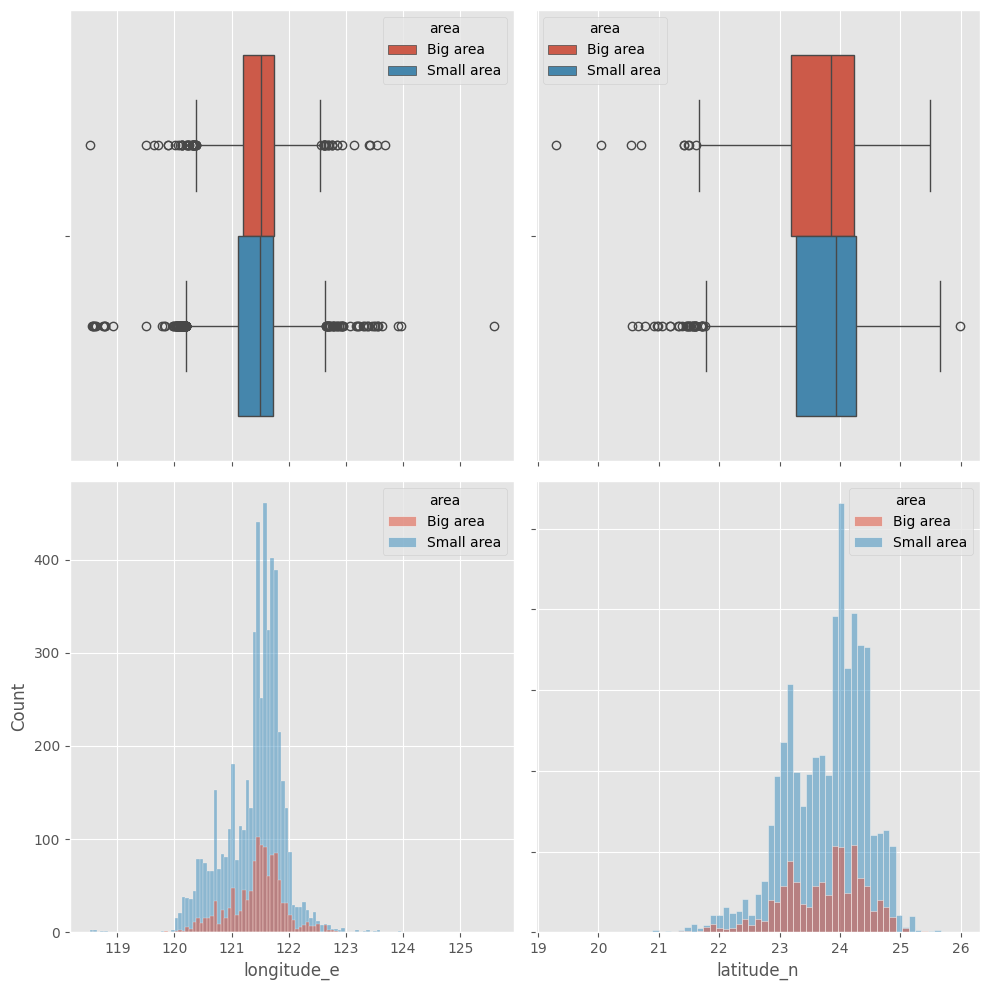

In [11]:
plt.style.use('ggplot')

fig, ax = plt.subplots(2,2, figsize=(10,10))

sns.boxplot(x=df['longitude_e'], ax=ax[0,0], hue=df['area'])


sns.boxplot(x=df['latitude_n'], ax = ax[0,1], hue=df['area'])
sns.histplot(x=df['longitude_e'], ax = ax[1,0], hue=df['area'])
sns.histplot(x=df['latitude_n'],ax = ax[1,1], hue=df['area'])
for ax in fig.get_axes():
    ax.label_outer()
plt.tight_layout()
plt.show()


Let's see how do these variables look like if we only exclude all the local earthquakes. 

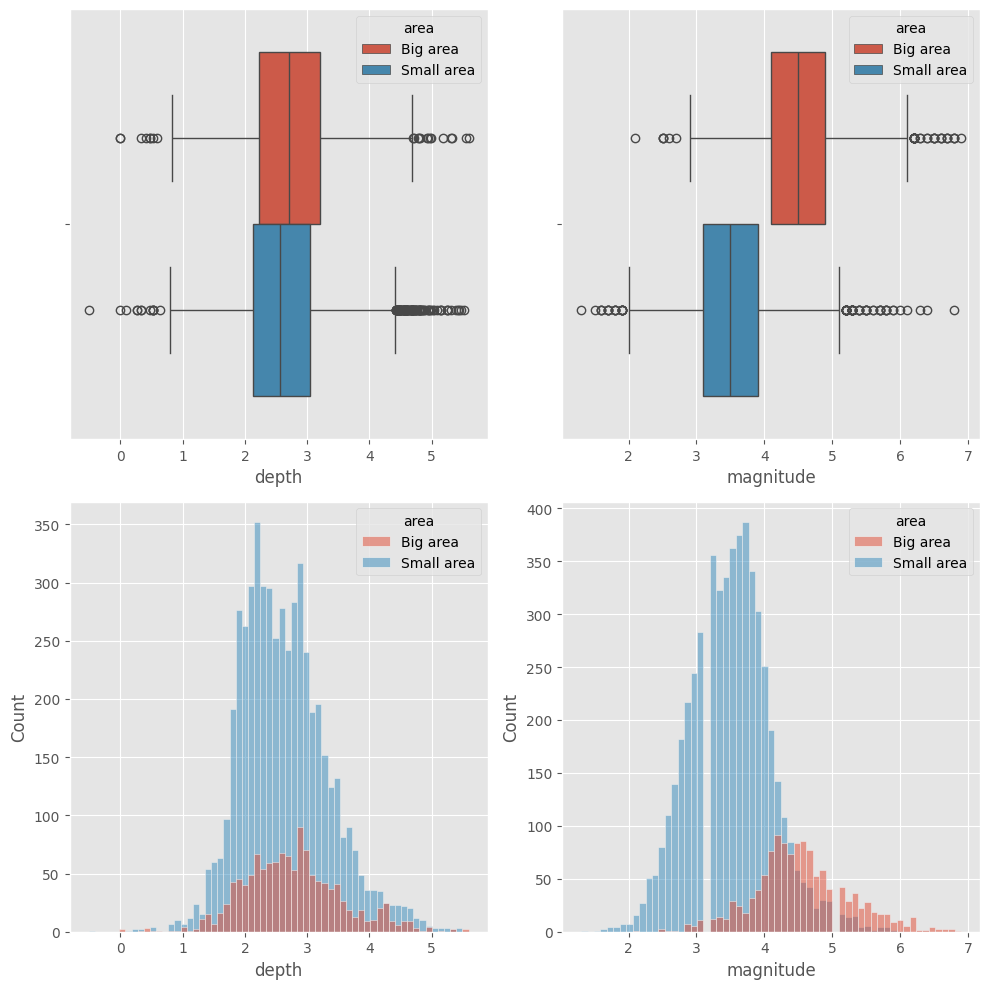

In [12]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

sns.boxplot(x=np.log(df['depth']), ax = ax[0,0], hue=df['area'])
sns.boxplot(x=df['magnitude'], ax = ax[0,1], hue=df['area'])
sns.histplot(x=np.log(df['depth']), ax = ax[1,0], hue=df['area'])
sns.histplot(x=df['magnitude'],ax = ax[1,1], hue=df['area'])

plt.tight_layout()

### 1.2 Distribution by county

In [13]:
#Extract the county from the loc_ful column

df['county'] = df['loc_name'].str.split(' ').apply(lambda x: x[-2])


In [14]:
# Add a region column 
def region(x):
    if x in ['Yilan', 'Hualien', 'Taitung']:
        return 'East'
    elif x in [ 'Taipei', 'Taoyuan', 'Keelung', 'Hsinchu']:
        return 'North'
    elif x in [ 'Taichung', 'Changhua', 'Nantou', 'Chiayi', 'Yunlin' ]:
        return 'Center'
    elif x in ['Kaohsiung', 'Tainan', 'Pintung']:
        return 'South'
    else :
        return 'Islands'
    
df['region'] = df['county'].apply(region)

In [15]:
df['region'].value_counts()

region
East       5186
Center      696
South       335
Islands     165
North       161
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='count'>

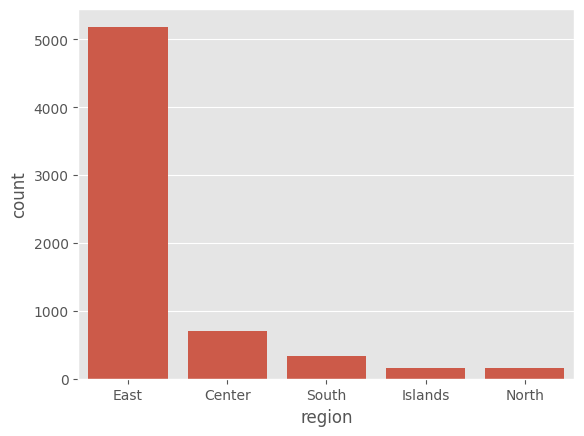

In [16]:
sns.barplot(data=df['region'].value_counts())

In [17]:
counties = df['county'].groupby(df['county']).count().sort_values(ascending=False).index.to_list()

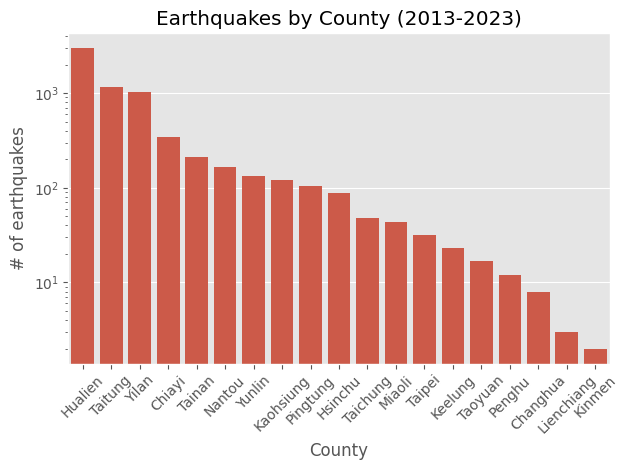

In [18]:
counties = df['county'].groupby(df['county']).count().sort_values(ascending=False)
sns.barplot(data=counties)

plt.xticks(rotation=45)
plt.ylabel('# of earthquakes')
plt.yscale('log')
plt.xlabel('County')
plt.title('Earthquakes by County (2013-2023)')
plt.tight_layout()
plt.show()

### 1.3 Magnitude difference


The dataset makes a difference between small and big area earthquakes. I'll look into their distributions to see if indeed they are fundamentally different phenomenons. The above boxplots show that they may be two distinct distributions with different mean and variance.

In [19]:
factor_b = df['area'].value_counts()[1]/df.shape[0]
factor_s = df['area'].value_counts()[0]/df.shape[0]

/tmp/ipykernel_5294/1504373096.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor_b = df['area'].value_counts()[1]/df.shape[0]
/tmp/ipykernel_5294/1504373096.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor_s = df['area'].value_counts()[0]/df.shape[0]


In [20]:
mu_s, std_s = norm.fit(df[df['number']=='Small area']['magnitude'])
mu_s, std_s

mu_b, std_b = norm.fit(df[df['number']!='Small area']['magnitude'])
mu_b, std_b

print('Small area earthquakes average magnitude of {} with standard deviation of {}'.format(round(mu_s,2), round(std_s,2)))
print('Big area earthquakes average magnitude of {} with standard deviation of {}'.format(round(mu_b,2), round(std_b,2)))

Small area earthquakes average magnitude of 3.51 with standard deviation of 0.6
Big area earthquakes average magnitude of 4.55 with standard deviation of 0.71


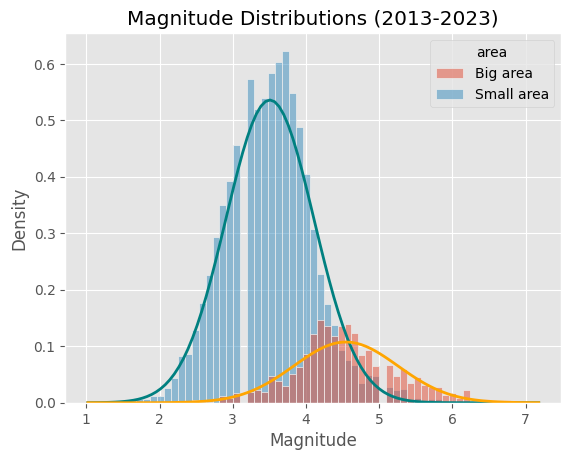

In [77]:
ax = sns.histplot(data=df, x='magnitude', stat='density', hue='area')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_s, std_s)*factor_s
q = norm.pdf(x, mu_b, std_b)*factor_b
plt.plot(x, p,linewidth=2 ,color = 'teal')
plt.plot(x, q, linewidth=2, color = 'orange')
plt.xlabel('Magnitude')
plt.ylabel('Density')
plt.title('Magnitude Distributions (2013-2023)')
plt.show()

In [22]:
df_s = df[df['area'] == 'Big area'].drop('area', axis=1)
df_b = df[df['area'] == 'Small area'].drop('area', axis=1)

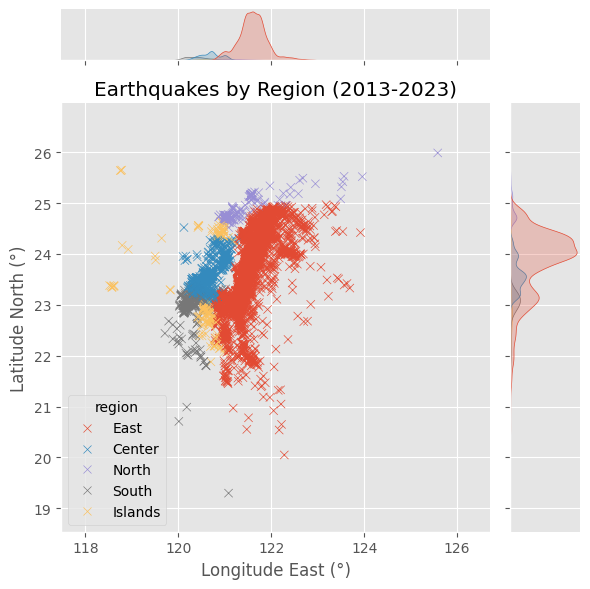

In [81]:
sns.jointplot(
    x=df['longitude_e'], 
    y=df['latitude_n'], 
    marker='x', 
    hue= df['region'],
    kind='scatter',
    marginal_kws={'color':'teal'})

plt.title('Earthquakes by Region (2013-2023)')
plt.xlabel('Longitude East (°)')
plt.ylabel('Latitude North (°)')
plt.tight_layout()
plt.show()

This representation shows that both earthquake distributions are spatially overlapped. The scatterplot resembles the actual map of Taiwan. The next graph shows the earthquakes on the map. 

In [84]:
fig = px.density_mapbox(df, lat='latitude_n', lon='longitude_e', z='magnitude', radius=5, center=dict(lat=23.5, lon=121.5), zoom=6.5, height=800, mapbox_style="open-street-map", hover_data=['latitude_n', 'longitude_e', 'magnitude'])

fig.update_layout(title='Earthquakes in Taiwan (2013-2023)')
fig.show()

### 1.4 Seismic center

I will define *seismic senter* as the average location of all the earthquakes in that year. Knowing that the magnitude scale used is logarithmic (one point increase in magnitude implies 10 times more energy released), the average will be weighted by the exponential of the magnitude. 

In [25]:
def w_average(df, variable, column):
    w_avg_lat = []
    
    for i in range(2013, 2024, 1):
        weight_list = np.exp(df[df['year'] == i][column])
        w_avg_lat.append(np.average(df[df['year'] == i][variable], weights=weight_list))

    return w_avg_lat

In [26]:
center_s_lat = w_average(df_s, 'latitude_n', 'magnitude')
center_s_lon = w_average(df_s, 'longitude_e', 'magnitude')

center_b_lat = w_average(df_b, 'latitude_n', 'magnitude')
center_b_lon = w_average(df_b, 'longitude_e', 'magnitude')

year = list(range(2013, 2024))

#### 1.4.1 Seismic center drift

In [27]:
centers = pd.DataFrame({'year': year, 'center_s_lat': center_s_lat, 'center_s_lon': center_s_lon, 'center_b_lat': center_b_lat, 'center_b_lon': center_b_lon})
centers

,year,center_s_lat,center_s_lon,center_b_lat,center_b_lon
0,2013,23.733551,121.717233,23.806294,121.462078
1,2014,23.856496,121.613969,23.788661,121.644399
2,2015,23.868615,121.757417,23.960147,121.651654
3,2016,23.925884,121.739350,23.687540,121.471307
4,2017,23.475459,121.277523,23.658891,121.370151
5,2018,23.904660,121.483051,23.806083,121.511691
6,2019,23.627331,121.581374,23.861930,121.476852
7,2020,23.608744,121.615276,23.608672,121.447356
8,2021,23.848732,121.645595,23.713271,121.584031
9,2022,23.329544,121.412291,23.583784,121.616836


In [28]:
#save centers as a csv file
centers.to_csv('centers.csv')

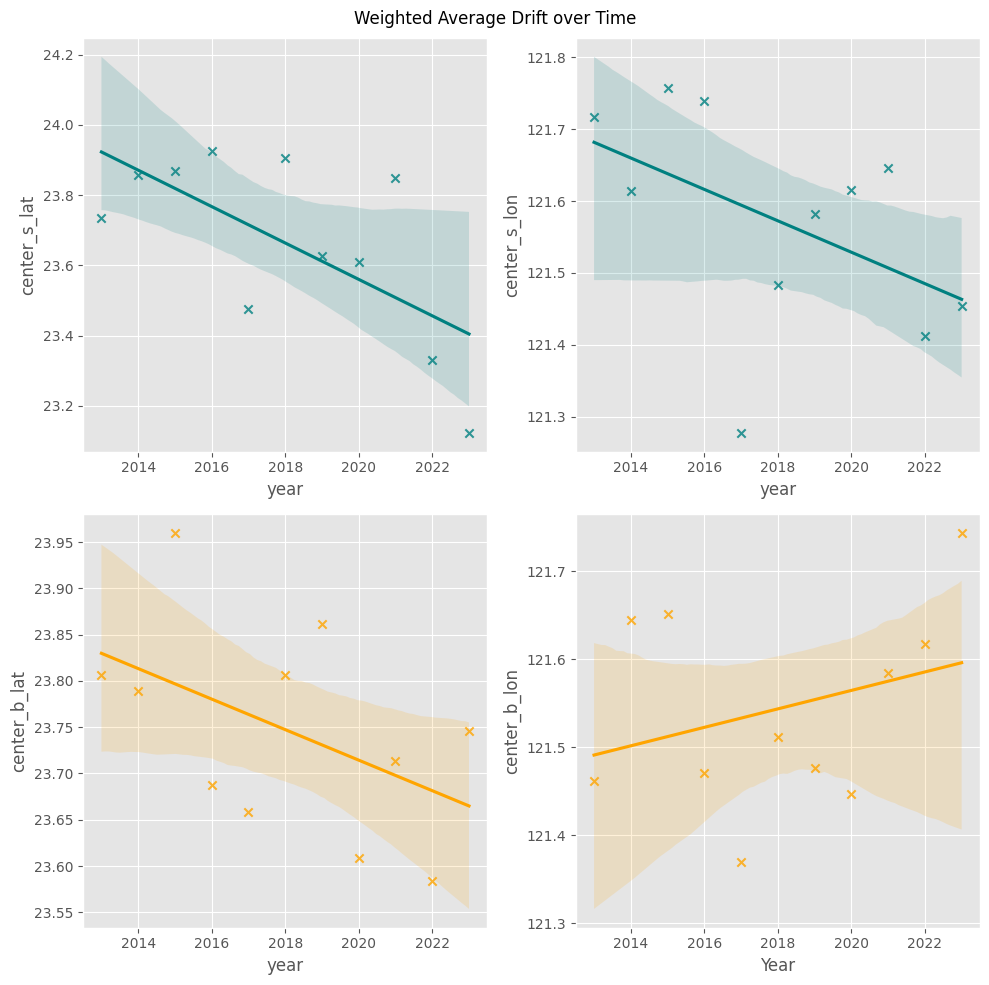

In [29]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

sns.regplot(data=centers, x='year', y='center_s_lat', marker='x', color='teal', ax=ax[0,0])

sns.regplot(data= centers, x='year', y='center_s_lon', marker='x', color='teal', ax=ax[0,1])

sns.regplot(data=centers, x='year', y='center_b_lat', marker='x', color='orange', ax=ax[1,0])

sns.regplot(data= centers, x='year', y='center_b_lon', marker='x', color='orange', ax=ax[1,1])


plt.suptitle('Weighted Average Drift over Time')
plt.xlabel('Year')
plt.tight_layout()
plt.show()


In [1]:
#make a plotly map graph with the center dataframe having different colors for each year value
fig = px.line_mapbox(centers, lat='center_s_lat', lon='center_s_lon', zoom=7.5, height=800, mapbox_style="open-street-map", hover_data=['year'])
fig.update_layout(title='Weighted Average Drift in Center Area (2013-2023)')

NameError: name 'px' is not defined

#### 1.4.2 Is this drift due to chance?

The following calculation aims to identify the nature of the apparent southward drift of the seismic center. 

In [31]:
formula = 'center_s_lat ~ year'
model = ols(formula=formula, data=centers).fit()
model_results = model.summary()

model_results

/home/hugo/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           center_s_lat   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     6.767
Date:                Tue, 02 Apr 2024   Prob (F-statistic):             0.0287
Time:                        12:17:51   Log-Likelihood:                 2.7113
No. Observations:                  11   AIC:                            -1.423
Df Residuals:                       9   BIC:                           -0.6268
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    128.3064     40.227      3.190      0.011      37.307     219.306
year          -0.0519      0.020     -2.601      0.029      -0.097      -0.007
==============================================================================
Omnibus:                        0.390   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.823   Jarque-Bera (JB):                0.479
Skew:                           0.169   Prob(JB):                        0.787
Kurtosis:                       2.035   Cond. No.                     1.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This means that the southward shift could be roughly modeled by the following function: 

$$
\text{Latitude} = 128.3064 - 0.0519 \cdot \text{Year}
$$

In other words, every year the average latitude decreases by 0.0519 degrees for the period of time contained in the dataset. 

#### 1.4.3 Verify Model Assumptions

For this model to have any validity at all there are few assumptions that have to be met by the dataset. 

The first of this assumptions is the linearity of the relationship between the variables. This seems to be met as shown in the avobe Weighed Average Drift over Time plots. 

The second assumption is that the observations are independent from each other. For this I'm going to assume that all the entries in the earthquake dataset belong to different earthquakes. This may be wrong for a small sample of the bigger earthquakes that may trigger smaller replicas, but the likelihood of these events decreases with magnitude and so this assumption may not be too misguided. The weighted average of all the quakes in a year is supposed to be independent from the weighted average for subsequent years, and so this assumption is met. 

The next steps are to verify the normality of the residuals. The QQ plot is a good way to verify this.

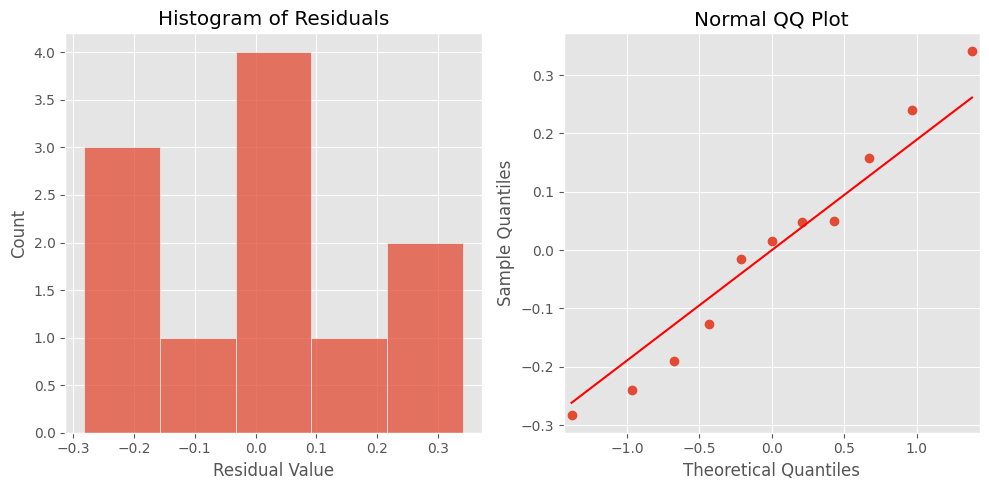

In [32]:
residuals = model.resid

fig,axes  = plt.subplots(1,2, figsize=(10,5))

sns.histplot(residuals, ax=axes[0], bins=5)

axes[0].set_xlabel("Residual Value")

axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])

axes[1].set_title("Normal QQ Plot")

plt.tight_layout()

plt.show()

The odd looking histogram on the left is an artifact of the low number of observations. Nevertheless the QQ plot confirms the absence of a particular trend in the residuals. The normality assumption is met as well. 


Lastly is the homoscedasticity or constant variance assumption. This can be checked in the following plot.

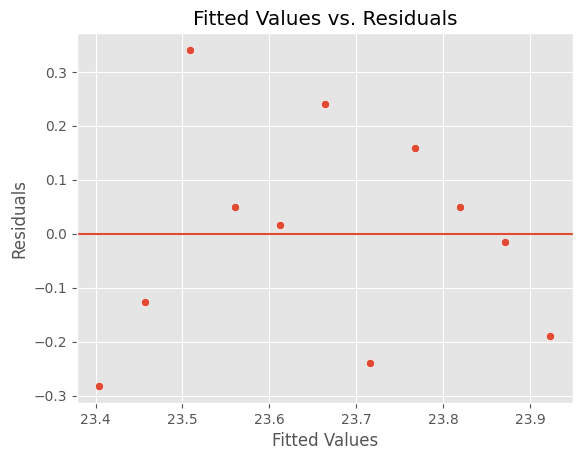

In [33]:
fig = sns.scatterplot(x=model.fittedvalues, y=residuals)

fig.set_xlabel('Fitted Values')

fig.set_ylabel('Residuals')

fig.set_title('Fitted Values vs. Residuals')

fig.axhline(0)

plt.show()

Again, the low number of observations in this center dataset makes this graph not very straightforward. One can see that negative residuals tend to happen in the extremes of the x-axis range. This may mean that the variance is dependant on the independent variable and therefore invalidating this assumption. 
Because the overall variance is contained within a symmetric range [-0.3,0.3], and roughly half of the observations fall on each side of the `y=0` axis, I will assume that the assumption is met.

#### 1.4.4 Conclusion

Let's look again at the model summary for the seismic center drift.


In [34]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           center_s_lat   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     6.767
Date:                Tue, 02 Apr 2024   Prob (F-statistic):             0.0287
Time:                        12:17:51   Log-Likelihood:                 2.7113
No. Observations:                  11   AIC:                            -1.423
Df Residuals:                       9   BIC:                           -0.6268
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    128.3064     40.227      3.190      0.011      37.307     219.306
year          -0.0519      0.020     -2.601      0.029      -0.097      -0.007
==============================================================================
Omnibus:                        0.390   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.823   Jarque-Bera (JB):                0.479
Skew:                           0.169   Prob(JB):                        0.787
Kurtosis:                       2.035   Cond. No.                     1.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using time as an independent variable, this model is able to explain $ 42.9 \% $ of the variation in latitude. For an event as unpredictable  as earthquakes this means there is a clear trend. The p-values of the coefficients are $0.011$ for the intercept (cross on the y-axis), and $0.029$ for the slope. Both of these values are smaller than the standard statistical significance level of $0.05$. Thus we can reject the null hypothesis and conclude that the drift **isn't due to chance**. In fact the drift seems to be following the tectonic boundary between the Eurasian and Phillippine Sea Plate. 

### 1.5 Relationship between depth and magnitude

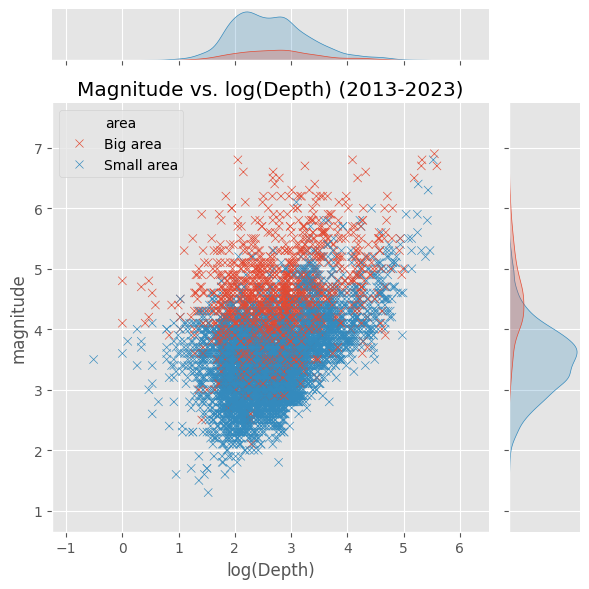

In [35]:
sns.jointplot(
    x=np.log(df['depth']), 
    y=df['magnitude'], 
    marker='x', 
    hue= df['area'],
    kind='scatter',
    marginal_kws={'color':'teal'})

plt.title('Magnitude vs. log(Depth) (2013-2023)')
plt.xlabel('log(Depth)')
plt.tight_layout()
plt.show()

### 1.6 Location and depth

In [78]:
fig = px.scatter_3d(df[df['magnitude'] >= 4], x='longitude_e', y='latitude_n', z='depth', color='magnitude',size='magnitude',size_max=10,opacity=0.7)
fig.update_layout(title='Earthquakes 2013-2023')
fig.update_layout(scene_zaxis_range=[250, 0])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=50))
fig.show()

### 1.7 Yearly distribution of earthquakes

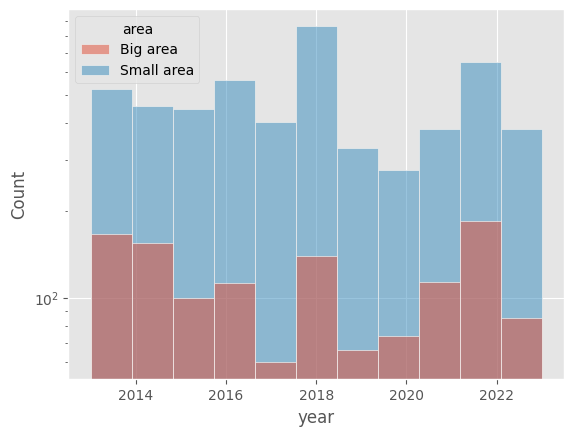

In [37]:
sns.histplot(data=df, x='year', bins=11, multiple='layer', hue='area')
plt.yscale('log')
plt.show()

### 1.8 Energy released




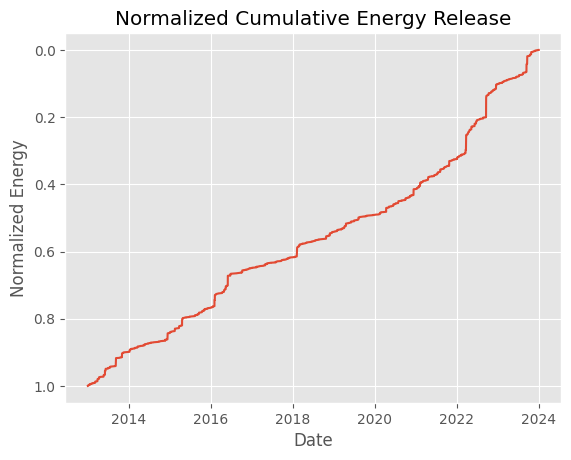

In [38]:
sns.lineplot(data=df, x='date', y='mag_exp_cumul_norm')
plt.gca().invert_yaxis()
plt.title('Normalized Cumulative Energy Release')
plt.xlabel('Date')
plt.ylabel('Normalized Energy')
plt.show()

## 2. Gutenberg-Richter Law

In seismology, the Gutenber-Richter law expresses the relationship between the magnitude and the total number of earthquakes in any given region and time period of at least that magnitude. 
$$
    N = e^{a - b \cdot M}
$$

The data fits the expected pattern quite well and, the next code blocks will calculate the parameters $a$ and $b$ for the region in the past ten years. 

In [39]:
grl = df[df['magnitude'] >= 3.5 ].groupby('magnitude')['magnitude'].count() 
gr_df = pd.DataFrame({'magnitude': grl.index, 'count': grl.values})

In [40]:
gr_df['log_count'] = np.log(gr_df['count'])

In [41]:
formula = 'log_count ~ magnitude'
model = ols(formula=formula, data=gr_df).fit()
model_results = model.summary()

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_count   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     928.7
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           9.58e-26
Time:                        12:17:55   Log-Likelihood:                -10.159
No. Observations:                  35   AIC:                             24.32
Df Residuals:                      33   BIC:                             27.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5099      0.295     42.358      0.000      11.909      13.111
magnitude     -1.6991      0.056    -30.475      0.000      -1.813      -1.586
==============================================================================
Omnibus:                        2.896   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                2.015
Skew:                          -0.582   Prob(JB):                        0.365
Kurtosis:                       3.160   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Gutenberg-Richter Law for the area of Taiwan in the last ten years could be expressed as

$$
N = e^{12,5099-1.6991 \cdot M}.
$$

With an R-squared value of 0.966 this is a significant good fit. In order to get this result it is necessary to exclude the earthquakes below the *roll-off* point. Earthquakes of magnitude below 3.5 were not part of this calculation because at those magnitudes it is likely that the numbers are not properly registered due to environmental noise around the seismometry stations.



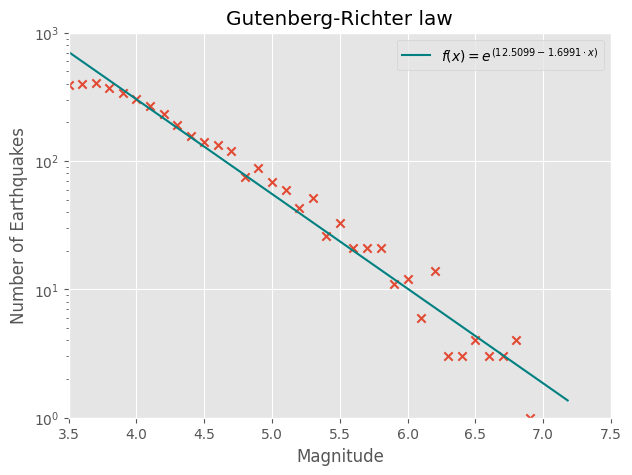

In [42]:
data = df[df['magnitude'] >= 3.5].groupby('magnitude')['magnitude'].count()

fig, ax = plt.subplots(1,1, figsize=(7,5))
#plot data as scatter plot
plt.scatter(x=data.index, y=data.values, marker='x')
plt.yscale('log')
plt.title('Gutenberg-Richter law')
plt.ylabel('Number of Earthquakes')
plt.xlabel('Magnitude')
plt.plot(x, np.exp(12.5099-1.6991*x), label=r'$f(x) = e^{(12.5099 - 1.6991 \cdot x)}$', color='teal')
plt.xlim(3.5,7.5)
plt.ylim(1,1000)
plt.legend(loc='upper right')
plt.draw()



An interpretation of the GR law is that of a probability estimation for earthquakes of a certain magnitude given the time window studied.

$$
    N = e^{a - b \cdot M} = e^a \cdot e^{-b \cdot M} = N_{TOT} \cdot P(M)
$$

The following table gives the probabilities of earthquakes of different magnitudes for a 10 year period. 

In [43]:
mag = [6, 6.5, 7, 7.5, 8]
p = np.exp(12.5099-1.6991*np.array(mag))
p

array([10.12796085,  4.33079012,  1.85187752,  0.79187637,  0.33861213])

| Magnitude | Probability (rounded) |
|:----------:|:-------------:|
| 6 | 10 |
| 6.5 | 4 |
| 7 | 2 |
| 7.5 | 1 |
| 8 | 0 |

## 3. Model Training

Something that I would like to explore is to see what are the factors that better determine if an earthquake leaves the *Small area* category. For that I will train a XGBoost model to classify the data. But first, let's prepare the data. 

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6543 entries, 0 to 6542
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   number              6543 non-null   object        
 1   date                6543 non-null   datetime64[ns]
 2   longitude_e         6543 non-null   float64       
 3   latitude_n          6543 non-null   float64       
 4   magnitude           6543 non-null   float64       
 5   depth               6543 non-null   float64       
 6   location            6543 non-null   object        
 7   loc_full            6543 non-null   object        
 8   loc_name            6543 non-null   object        
 9   mag_exp             6543 non-null   float64       
 10  mag_exp_cumul       6543 non-null   float64       
 11  mag_exp_cumul_norm  6543 non-null   float64       
 12  year                6543 non-null   int32         
 13  month               6543 non-null   object      

In [45]:
df.head()

,number,date,longitude_e,latitude_n,magnitude,depth,location,loc_full,loc_name,mag_exp,mag_exp_cumul,mag_exp_cumul_norm,year,month,day,hour,area,county,region
0,85,2023-12-31 05:57:10,121.839,24.6018,4.6,49.3,24.60N 121.84E,i.e. 16.3 km SSE of Yilan County(24.60N 121.84E,i.e. 16.3 km SSE of Yilan County),39810.717055,39810.717055,0.000144,2023,December,Sunday,5,Big area,Yilan,East
1,Small area,2023-12-26 08:21:57,121.491,23.0357,3.7,26.6,23.04N 121.49E,i.e. 46.7 km NE of Taitung County(23.04N 121.49E,i.e. 46.7 km NE of Taitung County),5011.872336,44822.589392,0.000162,2023,December,Tuesday,8,Small area,Taitung,East
2,Small area,2023-12-26 06:19:24,121.755,24.3803,3.0,6.3,24.38N 121.76E,i.e. 38.8 km S of Yilan County(24.38N 121.76E,i.e. 38.8 km S of Yilan County),1000.000000,45822.589392,0.000166,2023,December,Tuesday,6,Small area,Yilan,East
3,Small area,2023-12-25 19:04:24,121.184,23.1407,3.4,14.5,23.14N 121.18E,i.e. 42.8 km N of Taitung County(23.14N 121.18E,i.e. 42.8 km N of Taitung County),2511.886432,48334.475823,0.000175,2023,December,Monday,19,Small area,Taitung,East
4,Small area,2023-12-25 11:49:35,121.919,24.4283,3.8,29.9,24.43N 121.92E,i.e. 37.1 km SSE of Yilan County(24.43N 121.92E,i.e. 37.1 km SSE of Yilan County),6309.573445,54644.049268,0.000198,2023,December,Monday,11,Small area,Yilan,East


In [46]:
df_model = df.drop([
    'date',
    'number', 
    'location', 
    'loc_full', 
    'loc_name', 
    'mag_exp',
    'month',
    'day',
    'mag_exp_cumul', 
    'mag_exp_cumul_norm'], axis=1)
df_model.head()

,longitude_e,latitude_n,magnitude,depth,year,hour,area,county,region
0,121.839,24.6018,4.6,49.3,2023,5,Big area,Yilan,East
1,121.491,23.0357,3.7,26.6,2023,8,Small area,Taitung,East
2,121.755,24.3803,3.0,6.3,2023,6,Small area,Yilan,East
3,121.184,23.1407,3.4,14.5,2023,19,Small area,Taitung,East
4,121.919,24.4283,3.8,29.9,2023,11,Small area,Yilan,East


In [47]:
big_area = df_model[df_model['area'] == 'Big area']
small_area = df_model[df_model['area'] == 'Small area']

small_area_downsampled = resample(small_area, 
                            replace = True, 
                            n_samples = len(big_area), 
                            random_state= 42)

data_downsampled = pd.concat([big_area, small_area_downsampled],ignore_index=True)

data_downsampled.shape

(2506, 9)

In [48]:
df_dummies = pd.get_dummies(data_downsampled, columns=['area','county','region'], drop_first=True)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   longitude_e        2506 non-null   float64
 1   latitude_n         2506 non-null   float64
 2   magnitude          2506 non-null   float64
 3   depth              2506 non-null   float64
 4   year               2506 non-null   int32  
 5   hour               2506 non-null   int32  
 6   area_Small area    2506 non-null   bool   
 7   county_Chiayi      2506 non-null   bool   
 8   county_Hsinchu     2506 non-null   bool   
 9   county_Hualien     2506 non-null   bool   
 10  county_Kaohsiung   2506 non-null   bool   
 11  county_Keelung     2506 non-null   bool   
 12  county_Kinmen      2506 non-null   bool   
 13  county_Lienchiang  2506 non-null   bool   
 14  county_Miaoli      2506 non-null   bool   
 15  county_Nantou      2506 non-null   bool   
 16  county_Penghu      2506 

In [49]:
y = df_dummies['area_Small area']
X = df_dummies.drop('area_Small area', axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [51]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

In [52]:
cv_params = {'max_depth': [4, 6, None],
              'min_child_weight': [3, 4 ,5],
              'learning_rate': [0.1, 0.2, 0.3, 0.4],
              'n_estimators': [5,10,15,30],
              'subsample': [0.7, 0.5, 0.3],
              'colsample_bytree': [0.7, 0.5, 0.9]
              }

In [53]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [54]:
xgb_cv = GridSearchCV(xgb,
                    cv_params,
                    scoring = scoring,
                    cv= 5,
                    refit= 'f1',
                    verbose= 10
                    )

In [55]:
# xgb_cv = xgb_cv.fit(X_train, y_train)
# pkl.dump(xgb_cv, open('./data/xgb_cv.pkl','wb'))
xgb_cv = pkl.load(open('./data/xgb_cv.pkl','rb'))

In [56]:
xgb_cv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.4,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 30,
 'subsample': 0.7}

In [57]:
xgb_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [58]:
xgb_cv.best_score_

0.8803557884775053

## 4 Making Predictions


Once the model has been trained it is time to test its performance with data outside of the training set. 

In [59]:
y_pred = xgb_cv.predict(X_test)

### 4.1 Model evaluation

In [60]:
ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score: ', ac_score)

pc_score = metrics.precision_score(y_test, y_pred)
print('precision score: ', pc_score)

rc_score = metrics.recall_score(y_test, y_pred)
print('recall score: ', rc_score)

f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score: ', f1_score)

accuracy score:  0.8944223107569721
precision score:  0.8991935483870968
recall score:  0.8884462151394422
f1 score:  0.8937875751503006


### 4.2 Confusion Matrix

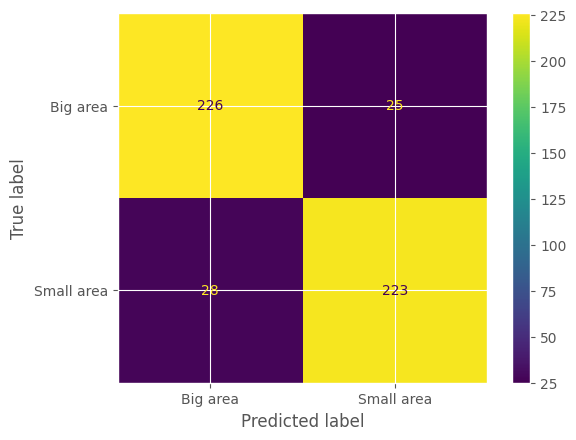

In [61]:
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Big area', 'Small area'])
disp.plot()

### 4.3 Model Importances


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

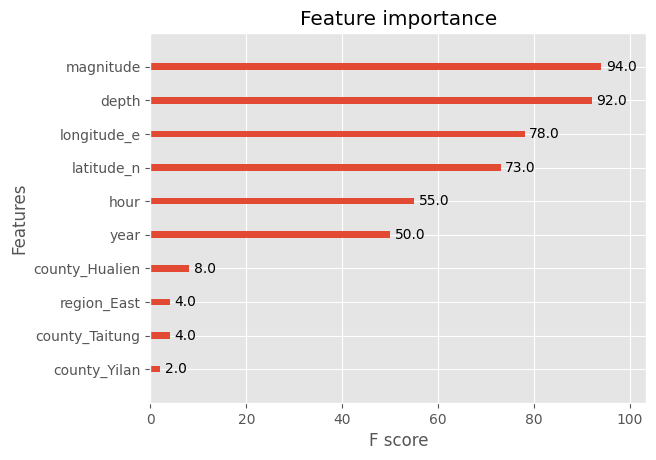

In [62]:
plot_importance(xgb_cv.best_estimator_)

This importance plot shows some expected results, namely that the most important features are the `magnitude` of the earthquake and its `depth`. These are measurements that, one can guess, define the quality of the earthquake. Location being the third and fourth most important features is also something one could imagine different geological regions may produce different types of earthquakes. 

The surprising fact is that `hour` and `year` have a somehow high importance in the model. It may be interesting to study the relationship between these two features and the earthquake quality.

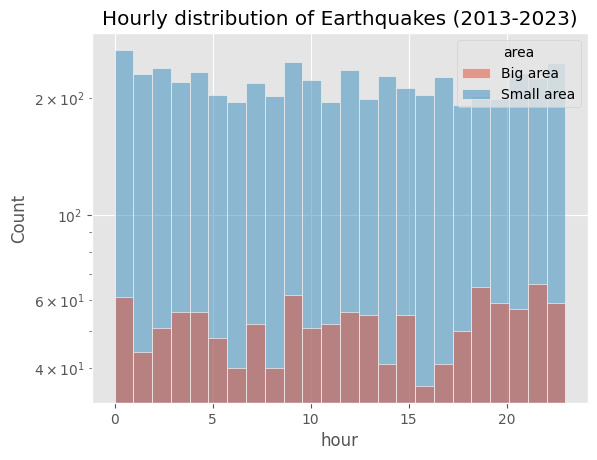

In [63]:
sns.histplot(data=df, x='hour', hue='area',bins=24,multiple='layer' )
plt.title('Hourly distribution of Earthquakes (2013-2023)')
plt.yscale('log')
plt.show()

In [64]:
#data taken from https://www.cwa.gov.tw/V8/E/C/Statistics/monthlymean.html and averaged on the whole island. 

mean_temp = [15.812,16.376,18.316,21.22,23.82,25.828,26.824,26.496,25.38,23.084,20.612,17.352]

In [65]:
#sort the rows by month from Jan to Dec
df.groupby('month')['month'].agg(['count'])

,count
month,
April,523
August,435
December,385
February,923
January,437
July,517
June,495
March,624
May,550


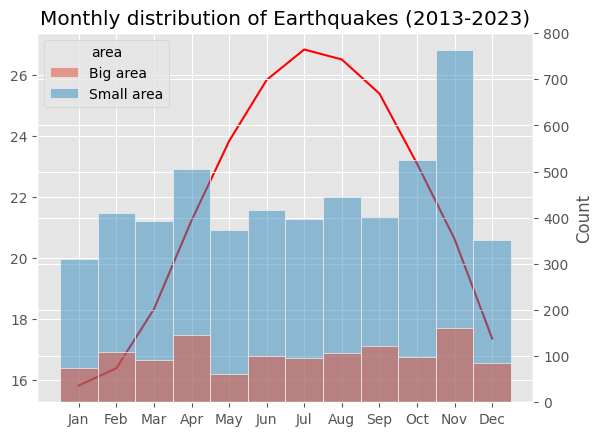

In [66]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twinx()
ax.plot(mean_temp, color='r')
sns.histplot(data=df, x='month',hue='area',bins=12,multiple='layer')
plt.title('Monthly distribution of Earthquakes (2013-2023)')



plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xticks(rotation=45)
plt.show()

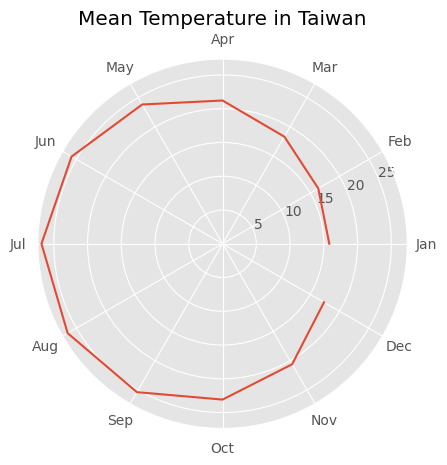

In [67]:
"""
=======================
Pie chart on polar axis
=======================

Demo of bar plot on a polar axis.
"""


# Compute pie slices
N = 12
bottom = 0
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 6

ax = plt.subplot(111, projection='polar')

bars = ax.plot(theta, mean_temp)


plt.xticks(theta, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Mean Temperature in Taiwan')
plt.show()

In [68]:
df.groupby('month')['month'].agg('count')

month
April        523
August       435
December     385
February     923
January      437
July         517
June         495
March        624
May          550
November     519
October      484
September    651
Name: month, dtype: int64

### 4.4 Model Refinements

In this section I will retrain the model choosing a different range for the gridsearch hyperparameters to see if there is room for improvement in predictive power. 

In [69]:
cv_params

{'max_depth': [4, 6, None],
 'min_child_weight': [3, 4, 5],
 'learning_rate': [0.1, 0.2, 0.3, 0.4],
 'n_estimators': [5, 10, 15, 30],
 'subsample': [0.7, 0.5, 0.3],
 'colsample_bytree': [0.7, 0.5, 0.9]}

In [70]:
xgb_cv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.4,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 30,
 'subsample': 0.7}

Comparing the best parameters from `xgb_cv` and the ranges set in `cv_params` one can see that almost all of the best parameters lay on the boundaries of the ranges given. This may mean that there may be a better value outside of the ranges in `cv_params` and therefore has to be explored. The ranges to extend are:

- `colsample_bytree`
- `learning_rate`
- `min_child_weight`
- `n_estimators`
- `subsample`

In [71]:
cv_params_new = {
    'max_depth': [6],
    'min_child_weight': [5,6,7],
    'learning_rate': [0.4, 0.5, 0.6],
    'n_estimators': [30, 40, 50],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.8,0.9,1]
}

In [72]:
xgb_cv_new = GridSearchCV(xgb,
                    cv_params_new,
                    scoring = scoring,
                    cv= 5,
                    refit= 'f1',
                    verbose= 10
                    )

In [73]:
# xgb_cv_new = xgb_cv_new.fit(X_train, y_train)
#pickle the model
# pkl.dump(xgb_cv_new, open('./data/xgb_cv_new.pkl','wb'))
xgb_cv_new = pkl.load(open('./data/xgb_cv_new.pkl','rb'))


In [74]:
xgb_cv_new.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.4,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 40,
 'subsample': 0.7}

In [75]:
xgb_cv_new.best_score_

0.8831919017368506

There is a marginal 3\% improvement and it turns out that most of the values were optimal already. The only one that changed is `n_estimators` from 30 to 40. 

## 5. Conclusion

The main takeaway I got from this notebook is the fact that the seismic activity has been drifting southwards and that the drift is statistically significant (not due to chance). Having a limited understanding of the underlying geological forces at play, I can only say that the seismic activity seems to follow the tectonic boundary between the Euro-Asiatic and Phillippine-sea plates southward. 

If this trend were to continue, one could expect more seismic activity in the Taitung and Pintung areas in the following years. Using the values that were found by fitting the data to the Gutenber-Richter distribution one could expect around **10 earthquakes** with magnitude **greater that 6** in the next ten years. 

On top of that, a model was trained in order to classify earthquakes as small or big area based on data gathered by the seismic stations. This gradient descent model had an accuracy of 89.44\% on the test set. This was done as a way to practice certain skills as the observations in the dataset were already classified. Another reason to train this model was to prove that the classification made by the [Central Weather Administration](https://www.cwa.gov.tw/V8/E/E/index.html) could be replicated from the data. 

